# Is Fandango still inflating movie ratings?

*This project is guided by DataQuest.*

## Executive Summary

I complete the analysis in the following steps: data exploration, data analysis and data correction.

I compare Fandango's ratings from two aspects: 

First is to compare ratings before and after Walt Hicke' Analysis which pointed out that Fandango inflated movie ratings;

Second is to compare Fandango's ratings with other institutions to see if Fandango inflated.

Also, I provide a normalized method to adjust Fandango's ratings to get a more fair ratings.

## Introduction

In October 2015, Walt Hickey suggested that Fandango's rating system was biased and dishonest. His analysis showed that movie ratings on Fandango was generally high or very high. 

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible.

In this project, we will analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis. 

## Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pre_ratings = pd.read_csv("fandango_score_comparison.csv")
aft_ratings = pd.read_csv("movie_ratings_16_17.csv")

In this project, I will work with two datasets: one is the data Hicket collected to analyze the characteristics of Fandango's rating system previous to his analysis; the other one is movie ratings data for movies released in 2016 and 2017 (after Hickey's analysis).

### Basic information of two datasets

In [167]:
# Get the basic information of two datasets
pre_ratings.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [166]:
aft_ratings.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


In [7]:
# Get the first few rows of two datasets
pre_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [8]:
aft_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


### Isolate the columns that will be used in this project

In [16]:
# For pre_ratings: 'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'
pre_ratings2015_df = pd.DataFrame(pre_ratings, 
                              columns = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'])
pre_ratings2015_df

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


In [17]:
# For post_ratings: 'movie', 'year', 'fandango'
aft_ratings2016_df = pd.DataFrame(aft_ratings,
                             columns = ['movie', 'year', 'fandango'])
aft_ratings2016_df

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


In [18]:
# Check if the movies in aft_ratings2016_df are after the year of 2016
aft_ratings2016_df['year'].value_counts()
## Yes

2016    191
2017     23
Name: year, dtype: int64

## Data Analysis

### Review Hickey's results by data visualization

Hickey hold the idea that Fandango had posted the ratings of movies higher than their raw ratings. In this way, Fandango would sell more tickets and gain more profits. In this part, we will check if the idea is reasonable by data visualization.

In [ ]:
# Calculate the mean ratings
raw_mean = pre_ratings2015_df['Fandango_Ratingvalue'].mean()
display_mean = pre_ratings2015_df['Fandango_Stars'].mean()
print(raw_mean, display_mean)

# Calculate the median ratings
row_median = pre_ratings2015_df['Fandango_Ratingvalue'].median()
display_median = pre_ratings2015_df['Fandango_Stars'].median()
print(row_median, display_median)

From the average and medians statistics, we can find that Fandango indeed displayed movie ratings in a higher star than its raw rating.

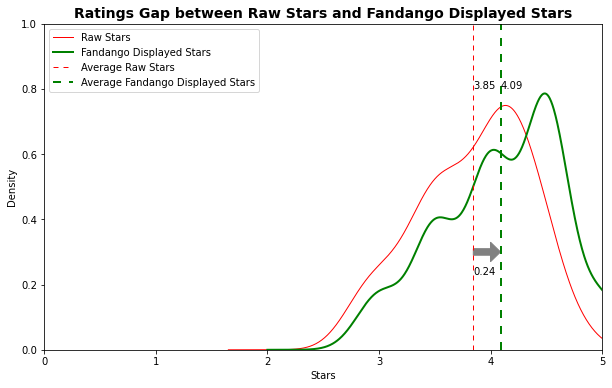

In [72]:
# Visualization
plt.figure(figsize = (10,6))
pre_ratings2015_df['Fandango_Ratingvalue'].plot.kde(label = 'Raw Stars', color = 'red', linewidth = 1, 
                                                    xlim = (0,5), ylim = (0,1))
pre_ratings2015_df['Fandango_Stars'].plot.kde(label = 'Fandango Displayed Stars', color = 'green', linewidth = 2,
                                             xlim = (0,5), ylim = (0,1))

plt.axvline(raw_mean, color = 'red', linewidth = 1, label = 'Average Raw Stars', dashes = (5,5))
plt.axvline(display_mean, color = 'green', linewidth = 2, label = 'Average Fandango Displayed Stars', dashes = (4,4))

plt.arrow(x = raw_mean, dx = display_mean - raw_mean, y = 0.3, dy = 0,
         width = 0.02, length_includes_head = True, color = 'grey')

plt.text(raw_mean, 0.8, round(raw_mean,2))
plt.text(display_mean, 0.8, round(display_mean,2))
plt.text(raw_mean, 0.23, round((display_mean - raw_mean), 2))

plt.legend()
plt.xlabel('Stars')
plt.title("Ratings Gap between Raw Stars and Fandango Displayed Stars", fontsize = 14, weight = 'bold')
plt.show()

The figure proves that Fandango displayed movie ratings higher than their raw ratings data. And the gap is about 0.24 stars in average. 

### Compare movie ratings before and after Hickey's analysis

In this part, I will compare movie ratings from Fandango before and after Hickey's analysis. I will explore it from three aspects:

First, to compare the average movie ratings of 2015 and after 2015;

Second, the percentage changes of movie ratings which are below 2.5 (including 2). It is to check that if Fandango gave more low ratings.

I will consider there is a significant change if both conditions are met.

In [93]:
# Calculate the average ratings
fand_2015_mean = pre_ratings2015_df['Fandango_Stars'].mean()
fand_2016_mean = aft_ratings2016_df['fandango'].mean()
print(fand_2015_mean, fand_2016_mean)

# Calculate the median ratings
fand_2015_median = pre_ratings2015_df['Fandango_Stars'].median()
fand_2016_median = aft_ratings2016_df['fandango'].median()
print(fand_2015_median, fand_2016_median)

4.089041095890411 3.8948598130841123
4.0 4.0


The average movie ratings before and after Hickey's Analysis is 4.09 and 3.89, with a reduction of 0.19. There is no difference in two medians.

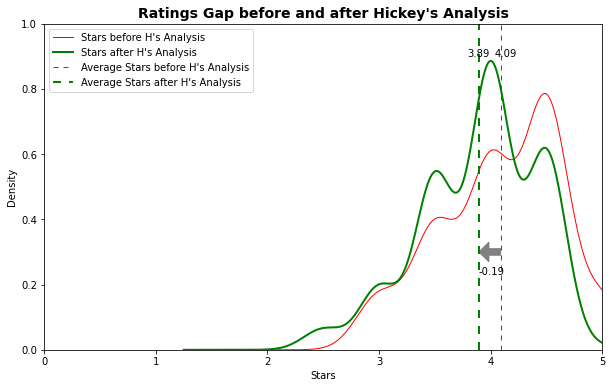

In [94]:
# Visualization
plt.figure(figsize = (10,6))
pre_ratings2015_df['Fandango_Stars'].plot.kde(label = "Stars before H's Analysis", color = 'red', linewidth = 1, 
                                                    xlim = (0,5), ylim = (0,1))
aft_ratings2016_df['fandango'].plot.kde(label = "Stars after H's Analysis", color = 'green', linewidth = 2,
                                             xlim = (0,5), ylim = (0,1))

plt.axvline(fand_2015_mean, color = 'red', linewidth = 1, label = "Average Stars before H's Analysis", dashes = (5,5))
plt.axvline(fand_2016_mean, color = 'green', linewidth = 2, label = "Average Stars after H's Analysis", dashes = (4,4))

plt.arrow(x = fand_2015_mean, dx = fand_2016_mean - fand_2015_mean, y = 0.3, dy = 0,
         width = 0.02, length_includes_head = True, color = 'grey')

plt.text((fand_2015_mean - 0.05), 0.9, round(fand_2015,2))
plt.text((fand_2016_mean - 0.1), 0.9, round(fand_2016,2))
plt.text(fand_2016_mean, 0.23, round((fand_2016_mean - fand_2015_mean), 2))

plt.legend()
plt.xlabel('Stars')
plt.title("Ratings Gap before and after Hickey's Analysis", fontsize = 14, weight = 'bold')
plt.show()

From the above figure, it is easy to find that after Hickey's analysis published in 2016, the average movie ratings reduced from 4.09 to 3.89, with a reduction of 0.19. However, **it is not a big drop**.

Also, for condition 2, we can see that the density of ratings below 2.5 was increased after Hickey's analysis. So, we hold the idea that **there is a slight influence to Fandango' ratings after the publish of Hickey's analysis**.

### Compare movie ratings among different institutions in 2016

In the dataset, besides movie ratings from Fandango, there are also four different institutions that give out ratings. In this part, we will make comparations among five institutions to explore whether F gave out higher ratings than others.

In [109]:
aft_ratings.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


We will use the data of 2016. We will use columns `fandango`, `nr_metascore`, `nr_imdb`, `nr_tmeter`, `nr_audience`, because these ratings have the same unit.

In [114]:
# Select the data

comp_2016 = pd.DataFrame(aft_ratings[aft_ratings['year'] == 2016], 
                         columns = ['fandango', 'nr_metascore', 'nr_imdb', 'nr_tmeter', 'nr_audience'])
# Check the data
comp_2016.head()

,fandango,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,3.5,4.0,3.5,4.5,4.0
1,4.5,2.5,3.5,2.5,4.0
2,3.0,2.5,3.5,2.0,2.5
4,3.0,3.0,3.0,3.5,3.0
5,4.0,4.0,4.0,4.5,4.0


In [116]:
comp_2016.describe()

,fandango,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,191.000000,191.000000,191.000000,191.000000,191.000000
mean,3.887435,2.685864,3.222513,2.727749,2.887435
std,0.509540,0.913789,0.504157,1.500602,1.043349
min,2.500000,0.500000,2.000000,0.000000,0.500000
25%,3.500000,2.000000,3.000000,1.500000,2.000000
50%,4.000000,2.500000,3.000000,3.000000,3.000000
75%,4.250000,3.500000,3.500000,4.000000,3.750000
max,5.000000,5.000000,4.000000,5.000000,4.500000


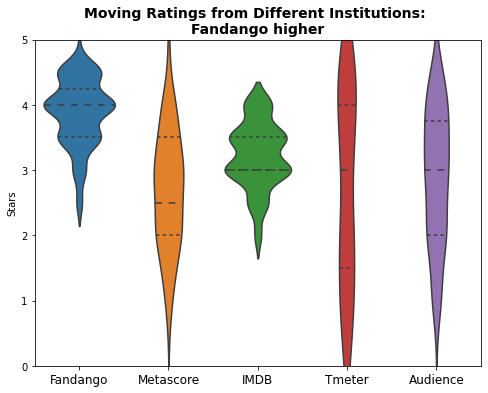

In [131]:
# Visualization
plt.figure(figsize = (8,6))
sns.violinplot(data = comp_2016, inner = 'quartiles')
plt.ylim(0,5)
plt.ylabel("Stars")
plt.xticks(ticks = range(0,5),
           labels = ['Fandango', 'Metascore', 'IMDB', 'Tmeter', 'Audience'], fontsize = 12)
plt.title("Moving Ratings from Different Institutions: \nFandango higher", fontsize = 14, weight = 'bold')
plt.show()

From the above figure, we can find that **Fandango inflated movie ratings than other institutions**. Because the lines in the first violin plots are higher than others. Further, we will normalize all scores to 5 stars to force the distributions of Fandango and IMDB ranging from 0 to 5.

#### Normalize to 5 stars

In [144]:
# Normalize Fandango
f_min = comp_2016['fandango'].min()
f_max = comp_2016['fandango'].max()
f_range = f_max - f_min
f_norm = ((comp_2016['fandango'] - f_min) / f_range) * 5
print(f_min)
print(f_max)
print(f_range)
#print(f_norm)

2.5
5.0
2.5


In [138]:
# Normalize IMDB
imdb_min = comp_2016['nr_imdb'].min()
imdb_max = comp_2016['nr_imdb'].max()
imdb_range = imdb_max - imdb_min
imdb_norm = (comp_2016['nr_imdb'] - imdb_min) / imdb_range * 5

In [142]:
# Create a new dataframe
norm_df = pd.concat([f_norm, imdb_norm, 
                            comp_2016[['nr_audience', 'nr_tmeter', 'nr_metascore']]], axis = 1)
norm_df.head()

,fandango,nr_imdb,nr_audience,nr_tmeter,nr_metascore
0,2.0,3.75,4.0,4.5,4.0
1,4.0,3.75,4.0,2.5,2.5
2,1.0,3.75,2.5,2.0,2.5
4,1.0,2.50,3.0,3.5,3.0
5,3.0,5.00,4.0,4.5,4.0


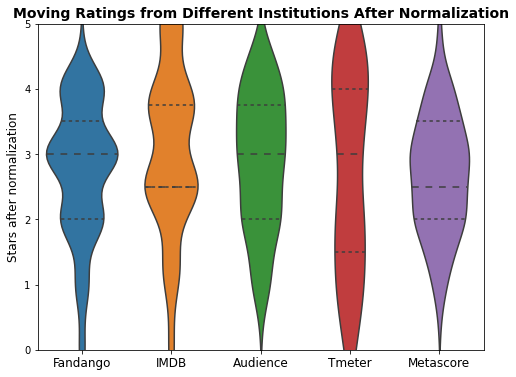

In [148]:
# Visualization
plt.figure(figsize = (8,6))
sns.violinplot(data = norm_df, inner = 'quartiles')
plt.ylim(0,5)
plt.ylabel("Stars after normalization", fontsize = 12)
plt.xticks(ticks = range(0,5),
           labels = ['Fandango', 'IMDB', 'Audience', 'Tmeter', 'Metascore'], fontsize = 12)
plt.title("Moving Ratings from Different Institutions After Normalization", fontsize = 14, weight = 'bold')
plt.show()

Now we can find that Fandango almost has the similar rating standards with other institutions. Therefore, I would like to provide a correction plan for Fandango ratings.

## Data Correction

In [176]:
correction_table = pd.DataFrame(
    columns = ['Fandango Ratings', 'New Ratings'])

In [177]:
correction_table['Fandango Ratings'] = pd.Series(range(4, 11, 1)) * 0.5
correction_table

,Fandango Ratings,New Ratings
0,2.0,NaN
1,2.5,NaN
2,3.0,NaN
3,3.5,NaN
4,4.0,NaN
5,4.5,NaN
6,5.0,NaN


In [185]:
correction_table['New Ratings'] =\
(correction_table['Fandango Ratings'] - 2) / 3 * 5
correction_table['New Ratings'] = correction_table['New Ratings'].round(1)
correction_table

,Fandango Ratings,New Ratings
0,2.0,0.0
1,2.5,0.8
2,3.0,1.7
3,3.5,2.5
4,4.0,3.3
5,4.5,4.2
6,5.0,5.0


## Conclusion

Finally, we can draw serveral conclusions:
1. Fandango inflated movie ratings;
2. After the publish of Hickey's Analysis, Fandango reduced its ratings, though in a slight change;
3. Comparing to other rating institutions, Fandango has a higher rating;
4. I give out a new rating system based on the analysis (just for reference;) )